In [41]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
import os
pd.set_option("max_columns", 10000)

%pylab inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [42]:
base_dir = ".."
input_dir = os.path.join(base_dir, "input")
pred_dir = os.path.join(base_dir, "predictions")
os.listdir( input_dir )

['dota2_abilities.csv',
 'dota2_skill_train.csv',
 'dota2_skill_test.csv',
 'ai-academy-2019-skill-prediction-data-csv-v1.zip',
 'dota2_skill_test.jsonlines',
 'dota2_items.csv',
 'dota2_heroes.csv',
 'ai-academy-2019-skill-prediction-data-jsonlines.zip',
 'dota2_skill_train.jsonlines']

In [43]:
# aditional
abilities = pd.read_csv( os.path.join(input_dir, 'dota2_abilities.csv') )
items = pd.read_csv( os.path.join(input_dir, 'dota2_items.csv') )
heroes = pd.read_csv( os.path.join(input_dir, 'dota2_heroes.csv') )
# Main dataset
train = pd.read_csv( os.path.join(input_dir, 'dota2_skill_train.csv'), index_col=0 )
test = pd.read_csv( os.path.join(input_dir, 'dota2_skill_test.csv'), index_col=0 )

In [44]:
print("Deleted", set(train.columns).difference( set(test.columns) ) )

y_train = train.skilled
train.drop(["skilled"], 1, inplace = True)

Deleted {'skilled'}


In [45]:
# Все столбцы одинаковые
all(train.columns == test.columns)

True

In [46]:
train.dtypes

player_team                  object
winner_team                  object
duration                      int64
pre_game_duration             int64
first_blood_time              int64
first_blood_claimed           int64
hero_id                       int64
hero_pick_order               int64
leaver_status                 int64
party_players                 int64
kills                         int64
deaths                        int64
assists                       int64
denies                        int64
level                         int64
net_worth                     int64
gold                          int64
gold_spent                    int64
last_hits                     int64
gold_per_min                  int64
xp_per_min                    int64
hero_damage                   int64
tower_damage                  int64
hero_healing                  int64
scaled_hero_damage            int64
scaled_tower_damage           int64
scaled_hero_healing           int64
stuns                       

In [47]:
train.describe()

,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,party_players,kills,deaths,assists,denies,level,net_worth,gold,gold_spent,last_hits,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,stuns,team_fight_participation,observer_wards_placed,sentry_wards_placed,creeps_stacked,camps_stacked,rune_pickups,tower_kills,roshan_kills,nearby_creep_death_count,radiant_tower_status,dire_tower_status,radiant_barracks_status,dire_barracks_status,fight_score,farm_score,support_score,push_score,avg_kills_x16,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
count,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.00000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000,99871.000000
mean,2250.174565,87.007540,99.443632,0.094181,55.319012,5.696398,0.059036,1.923812,7.701966,7.257552,12.383765,11.116991,20.909503,15147.444063,1955.426911,15500.778104,156.740025,495.767981,633.801995,22359.153718,2622.835328,772.168197,13300.375304,1434.62018,336.655656,30.809994,0.534706,2.323658,2.468234,1.355208,0.502789,4.587368,1.113617,0.118082,334.103964,1064.962271,904.999069,39.805449,39.805449,0.702835,181.712835,2525.062110,932.184676,7.751379,7.494778,12.525508,434.118793,521.459212,19.950106,26.582562,641.291576,764.499044,1.103343,4.681980
std,668.044566,8.989983,82.641289,0.292083,36.272622,2.964638,0.325695,1.326061,5.599271,3.976187,6.959065,9.948615,4.590298,7731.533002,1872.670284,7336.334843,117.873056,220.666881,324.200454,14354.682842,3379.331385,2173.979411,7059.120452,1854.14807,885.543941,38.011688,0.155754,4.200657,5.547188,3.999302,1.156360,3.472868,1.474892,0.378855,164.536821,923.940808,911.273063,27.830444,27.830444,0.162495,98.981437,4980.807056,1132.265518,3.364292,2.241594,3.795104,97.892907,96.611291,9.247248,8.501722,203.426666,188.305318,1.605713,3.146928
min,601.000000,60.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,95.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-21.187622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1797.000000,90.000000,30.000000,0.000000,23.000000,3.000000,0.000000,1.000000,4.000000,4.000000,7.000000,4.000000,18.000000,9409.000000,610.000000,10185.000000,65.000000,350.000000,441.500000,12057.000000,218.000000,0.000000,8117.000000,122.00000,0.000000,0.000000,0.437500,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,223.000000,0.000000,0.000000,3.000000,3.000000,0.625000,101.680872,50.000000,86.008130,5.000000,6.000000,10.000000,359.000000,454.000000,13.000000,21.000000,515.000000,671.000000,0.000000,2.000000
50%,2208.000000,90.000000,89.000000,0.000000,51.000000,6.000000,0.000000,1.000000,7.000000,7.000000,12.000000,8.000000,22.000000,14303.000000,1407.000000,14480.000000,132.000000,456.000000,579.000000,19138.000000,1226.000000,0.000000,12045.000000,675.00000,0.000000,18.961864,0.541667,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,308.000000,1572.000000,384.000000,51.000000

In [48]:
#Нет нанов
all(train.describe().loc["count"] == train.shape[0])

True

In [49]:
# Transformation
def apply(func, columns):
    global train, test
    for c in tqdm(columns):
        train[c] = train[c].apply(func)
        test[c] = test[c].apply(func)


def tr(x):
    if x=='dire':
        return 0.0
    elif x=='radiant':
        return 1.0
apply(tr, ["player_team", "winner_team"])

100%|██████████| 2/2 [00:00<00:00, 16.27it/s]


In [50]:
# New features
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train, test), axis=0)


In [51]:
all_data['_win'] = all_data['player_team'] == all_data['winner_team']

In [52]:
all_data['_kda'] = (all_data.kills + all_data.assists)/ all_data.deaths

In [53]:
all_data['_duration_min'] = all_data.duration / 60
all_data['__gold_dame'] = all_data['_duration_min'] * all_data.gold_per_min
all_data['__xp_dame'] = all_data['_duration_min'] * all_data.xp_per_min
all_data['__free_gold'] = all_data['__gold_dame'] - all_data.gold_spent

In [54]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [58]:
train.index

Int64Index([     7,      8,     12,     13,     14,     15,     19,     23,
                25,     26,
            ...
            193396, 193397, 193398, 193399, 193400, 193401, 193403, 193404,
            193407, 193409],
           dtype='int64', name='id', length=99871)

In [27]:
train.first_blood_claimed.unique(), train[train.first_blood_claimed==0].first_blood_time.unique().shape # Хз как работает fbc

(array([0, 1]), (558,))

In [20]:
train.sample().T

id,47939
player_team,1
winner_team,0
duration,1637
pre_game_duration,90
first_blood_time,0
first_blood_claimed,0
hero_id,21
hero_pick_order,8
leaver_status,0
party_players,1


In [14]:
pd.concat( (train._kda, y_train), axis=1)

,_kda,skilled
id,,
7,3.125000,1
8,2.888889,0
12,6.200000,0
13,1.333333,1
14,1.300000,1
15,2.142857,0
19,3.625000,0
23,0.666667,1
25,4.857143,0


In [15]:
from sklearn.model_selection import cross_val_score
import catboost as cb
import lightgbm as lgb

In [16]:
cross_val_score(
    lgb.LGBMClassifier(),
    train,
    y_train,
    scoring="accuracy",
    cv = 4,
    verbose=1
)

/home/furfa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/furfa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/furfa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/furfa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

array([0.74175978, 0.74327139, 0.74694597, 0.74294068])

In [73]:
model = lgb.LGBMClassifier().fit(train, y_train)

In [74]:
y_pred = model.predict(test)
df_submission_tree = pd.DataFrame({'id' : test.index, 'skilled': y_pred})
df_submission_tree.to_csv( os.path.join(pred_dir, "Raw lgb.csv") , index=None)
df_submission_tree.tail() #0.7406

,id,skilled
43260,193392,0
43261,193393,0
43262,193402,0
43263,193410,0
43264,193411,0


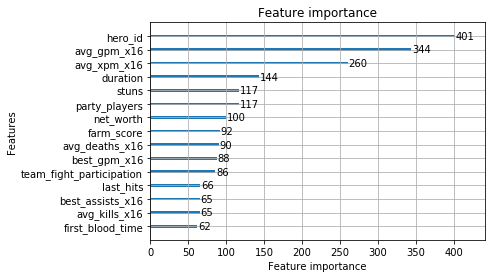

In [75]:
lgb.plot_importance(model, max_num_features=15)

In [76]:
import catboost as cb
from sklearn.model_selection import KFold,StratifiedKFold
from paramsearch import paramsearch
from itertools import product,chain
import lightgbm as lgb

```python
params = {'boosting_type': ['gbdt'],
 'colsample_bytree': [0.64, 0.65, 0.66],
 'learning_rate': [0.03,0.001,0.01,0.1,0.2,0.3],
'num_iterations' : [250,100,500,1000],
 'max_bin': [512],
 'max_depth': [3,1,2,6,4,5,7,8,9,10],
 'metric': ['binary_error'],
 'min_child_samples': [5],
 'min_child_weight': [1],
 'min_split_gain': [0.5],
 'n_estimators': range(10,800,80),
 'nthread': [5],
 'num_class': [1],
 'num_leaves': [6, 8, 12, 16],
 'objective': ['binary'],
 'random_state': [501],
 'reg_alpha': [1, 1.2,1.3,1.4],
 'reg_lambda': [1, 1.2, 1.4,1.5,1.6],
 'scale_pos_weight': [1],
 'subsample': [0.7, 0.75],
 'subsample_for_bin': [200],
 'subsample_freq': [1]}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rs_lgb_model = RandomizedSearchCV(
                   lgb.LGBMClassifier(),
                   params,
                   n_iter=40,
                   n_jobs=-1)
rs_lgb_model.fit(train, y_train)
```

In [28]:
rs_lgb_model.best_score_

0.7501176517707843

### 0.7501176517707843
```python
{'subsample_freq': 1,
 'subsample_for_bin': 200,
 'subsample': 0.7,
 'scale_pos_weight': 1,
 'reg_lambda': 1.5,
 'reg_alpha': 1.4,
 'random_state': 501,
 'objective': 'binary',
 'num_leaves': 16,
 'num_iterations': 1000,
 'num_class': 1,
 'nthread': 5,
 'n_estimators': 170,
 'min_split_gain': 0.5,
 'min_child_weight': 1,
 'min_child_samples': 5,
 'metric': 'binary_error',
 'max_depth': 3,
 'max_bin': 512,
 'learning_rate': 0.2,
 'colsample_bytree': 0.64,
 'boosting_type': 'gbdt'}
```

In [80]:
model_lgb_ns = lgb.LGBMClassifier(**{
    'subsample_freq': 1,
     'subsample_for_bin': 200,
     'subsample': 0.7,
     'scale_pos_weight': 1,
     'reg_lambda': 1.5,
     'reg_alpha': 1.4,
     'random_state': 501,
     'objective': 'binary',
     'num_leaves': 16,
     'num_iterations': 1000,
     'num_class': 1,
     'nthread': 5,
     'n_estimators': 170,
     'min_split_gain': 0.5,
     'min_child_weight': 1,
     'min_child_samples': 5,
     'metric': 'binary_error',
     'max_depth': 3,
     'max_bin': 512,
     'learning_rate': 0.2,
     'colsample_bytree': 0.64,
     'boosting_type': 'gbdt'
    }).fit(train, y_train)

In [81]:
y_pred = model_lgb_ns.predict(test)
df_submission_tree = pd.DataFrame({'id' : test.index, 'skilled': y_pred})
df_submission_tree.to_csv( os.path.join(pred_dir, "lgb_fitted.csv") , index=None)
display( df_submission_tree.tail() )
display( pd.Series(y_pred).value_counts() )

,id,skilled
43260,193392,0
43261,193393,0
43262,193402,0
43263,193410,0
43264,193411,0


0    28018
1    15247
dtype: int64

In [82]:
train.tow

,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,party_players,kills,deaths,assists,denies,level,net_worth,gold,gold_spent,last_hits,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,stuns,team_fight_participation,observer_wards_placed,sentry_wards_placed,creeps_stacked,camps_stacked,rune_pickups,tower_kills,roshan_kills,nearby_creep_death_count,radiant_tower_status,dire_tower_status,radiant_barracks_status,dire_barracks_status,fight_score,farm_score,support_score,push_score,avg_kills_x16,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak,_win,_kda
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,2140,90,129,0,90,9,0,3,3,8,22,1,18,10819,1119,11765,76,375,434,13262,873,155,8878,490,168,10.106689,0.694444,3,3,8,3,4,0,0,298,0,2046,0,0,0.888889,112.769130,1660.0,437.869050,2,8,15,352,430,10,30,551,745,2,5,True,3.125000
8,1.0,1.0,2138,90,174,0,5,5,0,1,3,9,23,1,21,6719,1014,10060,26,313,554,15569,1101,400,10590,581,333,70.608030,0.456140,15,13,8,2,2,1,0,262,2047,0,63,63,0.777778,44.594570,11760.0,709.441300,4,9,19,294,425,13,37,445,717,2,12,True,2.888889
12,1.0,1.0,3547,90,360,0,81,7,0,1,13,5,18,34,25,31946,3321,32420,387,582,709,56407,5526,400,24293,3092,361,48.329970,0.620000,1,1,0,0,11,2,0,687,1830,0,63,63,0.769231,288.519170,500.0,1708.284300,13,7,9,493,543,23,18,691,762,3,3,True,6.200000
13,0.0,1.0,1878,90,28,0,74,9,0,2,1,6,7,10,16,7849,1469,7685,99,303,413,12048,516,0,6021,404,0,29.853643,0.320000,3,0,15,4,2,1,0,199,1983,0,63,63,0.250000,158.204990,900.0,521.821100,10,7,12,515,583,25,34,869,935,0,6,False,1.333333
14,0.0,1.0,2232,90,129,0,14,6,0,2,2,10,11,0,17,4105,475,5615,7,194,354,9880,0,0,7725,0,0,50.930786,0.541667,9,3,0,0,4,0,0,240,1974,0,63,63,0.888889,8.776043,3630.0,0.000000,8,10,16,337,452,34,43,672,797,0,9,False,1.300000
15,0.0,1.0,2706,90,138,0,61,8,1,3,9,7,6,10,25,18999,2104,19695,318,514,630,26507,4536,0,16636,2273,0,4.515381,0.405405,1,0,0,0,2,5,0,546,1798,256,63,63,0.636364,266.043730,150.0,4419.663600,10,7,5,480,622,23,16,730,1010,0,4,False,2.142857
19,1.0,1.0,2244,90,0,0,114,10,0,5,8,8,21,35,22,16263,2578,14805,154,482,576,21279,6399,0,15377,3130,0,31.215180,0.517857,0,0,0,0,2,2,0,314,1847,0,63,63,0.888889,212.134570,0.0,244.170720,9,7,11,473,578,19,21,659,749,3,5,True,3.625000
23,0.0,0.0,1014,90,319,0,85,6,0,1,0,3,2,6,11,7459,104,9350,72,559,413,1303,2820,462,780,1470,316,1.699592,0.666667,1,0,0,0,6,0,0,133,260,2047,51,51,0.200000,163.296250,3107.0,594.336300,5,8,16,356,408,17,36,559,789,1,6,True,0.666667
25,0.0,0.0,2620,90,58,0,62,2,0,2,3,7,31,1,24,16840,3010,15625,64,446,578,12812,2016,1902,7432,1150,781,0.801090,0.471429,0,0,0,0,9,1,0,289,260,1830,51,51,0.900000,74.449570,2052.0,451.269780,5,5,18,405,429,12,31,513,578,2,2,True,4.857143
